# Data Exploration

### Question 1
- How does the issued loans vary year after year?
- What are the purposes of applying **Lending Club** loans?
- Do you observe different loan grade patterns for different loan purposes?
- Do you observe different loan grade patterns in different years?
- How about loan counts stratified into years and loan purposes/loan grades?

In [1]:
%pylab inline
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
accepted = pd.read_csv('accepted_2007_to_2018Q4.csv')

/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
accepted.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [11]:
accepted.issue_d.value_counts()

Mar-2016    61992
Oct-2015    48631
May-2018    46311
Oct-2018    46305
Aug-2018    46079
            ...  
Aug-2007       74
Jul-2007       63
Sep-2008       57
Sep-2007       53
Jun-2007       24
Name: issue_d, Length: 139, dtype: int64

In [26]:
accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [50]:
test = accepted.iloc[0,:]
test

id                       68407277
member_id                     NaN
loan_amnt                    3600
funded_amnt                  3600
funded_amnt_inv              3600
                           ...   
settlement_status             NaN
settlement_date               NaN
settlement_amount             NaN
settlement_percentage         NaN
settlement_term               NaN
Name: 0, Length: 151, dtype: object

In [29]:
test['issue_d'].split("-")[1]

'2015'

In [39]:
test['year'] = test['issue_d'].split("-")[1]
test

/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


id                       68407277
member_id                     NaN
loan_amnt                    3600
funded_amnt                  3600
funded_amnt_inv              3600
                           ...   
settlement_date               NaN
settlement_amount             NaN
settlement_percentage         NaN
settlement_term               NaN
year                         2015
Name: 0, Length: 152, dtype: object

In [32]:
accepted['hardship_reason'].value_counts()

NATURAL_DISASTER         2965
EXCESSIVE_OBLIGATIONS    2155
UNEMPLOYMENT             1923
INCOME_CURTAILMENT       1321
MEDICAL                  1294
REDUCED_HOURS             662
DIVORCE                   225
FAMILY_DEATH              214
DISABILITY                158
Name: hardship_reason, dtype: int64

In [80]:
accepted['loan_amnt'].describe()

count    2.260668e+06
mean     1.504693e+04
std      9.190245e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.290000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

In [41]:
accepted['grade'].value_counts()

B    663557
C    650053
A    433027
D    324424
E    135639
F     41800
G     12168
Name: grade, dtype: int64

In [45]:
subset = accepted[['grade','issue_d','purpose','int_rate','term']]

In [46]:
subset['issue_d'] = subset['issue_d'].astype(str).dropna()
subset['year'] = subset['issue_d'].apply(lambda x: x.split("-")[-1]) 

/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
subset = subset.drop(['issue_d'], axis=1).dropna()
subset

,grade,purpose,int_rate,term,year
0,C,debt_consolidation,13.99,36 months,2015
1,C,small_business,11.99,36 months,2015
2,B,home_improvement,10.78,60 months,2015
3,C,debt_consolidation,14.85,60 months,2015
4,F,major_purchase,22.45,60 months,2015
...,...,...,...,...,...
2260694,C,home_improvement,12.79,60 months,2016
2260695,B,debt_consolidation,10.49,60 months,2016
2260696,B,debt_consolidation,10.49,60 months,2016
2260697,C,debt_consolidation,14.49,60 months,2016


In [94]:
subset['year'].value_counts()

2018    495242
2017    443579
2016    434407
2015    421095
2014    235629
2013    134814
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
nan         33
Name: year, dtype: int64

In [48]:
subset2 = subset.groupby(['year','grade'])['year'].count().unstack('grade').fillna(0)

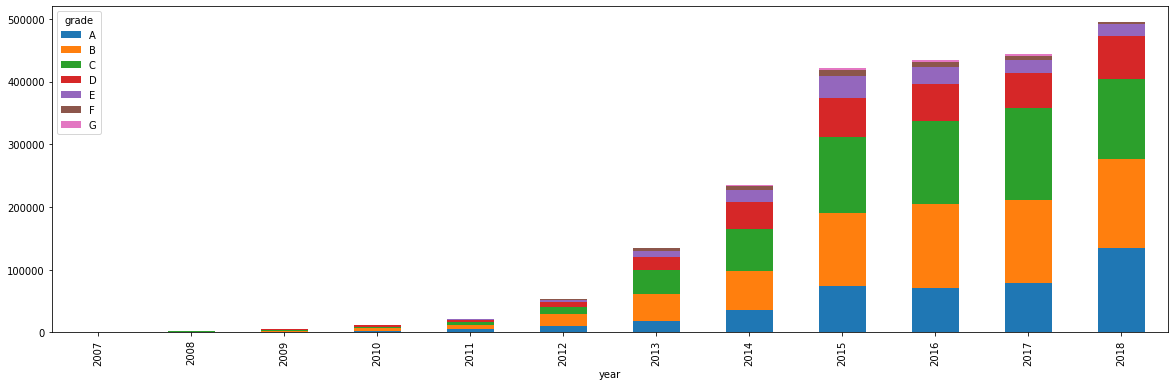

In [49]:
subset2.plot(kind='bar', stacked=True, figsize=(20,6))

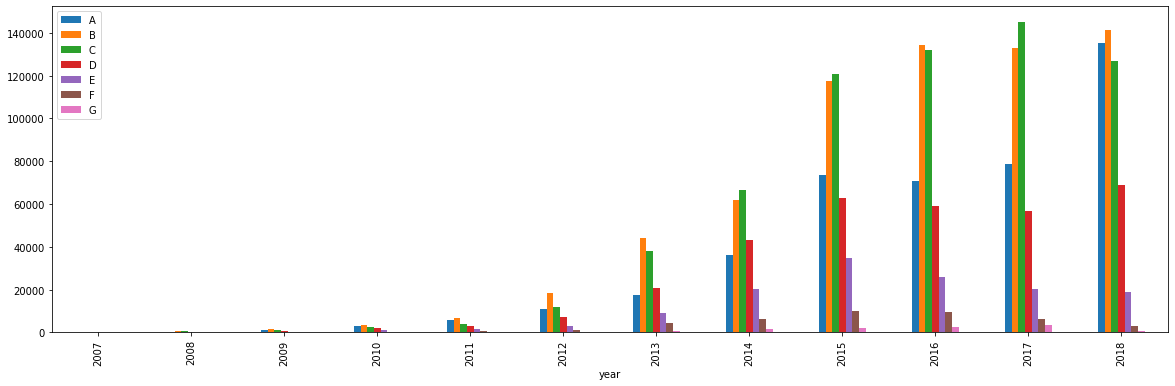

In [18]:
subset2.plot(kind='bar', figsize=(20,6))
plt.legend(loc=2)

In [24]:
accepted['purpose'].value_counts()

debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64

In [49]:
subset2

grade,A,B,C,D,E,F,G
year,,,,,,,
2007,78,98,141,99,100,52,35
2008,318,594,580,419,285,111,86
2009,1203,1445,1348,817,308,105,55
2010,2830,3687,2729,1885,962,311,133
2011,5754,6565,3942,2796,1739,722,203
2012,10901,18507,11875,7323,3185,1315,261
2013,17679,44116,38134,20569,9059,4393,864
2014,36108,61935,66565,42992,20121,6223,1685
2015,73336,117606,120567,62654,34948,9817,2167


In [64]:
subset3 = subset.groupby(['year','purpose'])['year'].count().unstack('purpose').fillna(0)
subset3

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
year,,,,,,,,,,,,,,
2007,13.0,87.0,207.0,36.0,36.0,8.0,10.0,9.0,15.0,113.0,0.0,56.0,4.0,9.0
2008,54.0,399.0,976.0,85.0,140.0,26.0,91.0,51.0,31.0,339.0,3.0,127.0,14.0,57.0
2009,191.0,626.0,2194.0,187.0,388.0,72.0,258.0,91.0,67.0,659.0,6.0,368.0,28.0,146.0
2010,419.0,1545.0,5729.0,114.0,955.0,104.0,873.0,220.0,213.0,1443.0,39.0,466.0,127.0,290.0
2011,938.0,2820.0,10670.0,0.0,1680.0,216.0,1079.0,382.0,303.0,1871.0,58.0,975.0,227.0,502.0
2012,901.0,10365.0,30811.0,0.0,2893.0,418.0,1360.0,630.0,399.0,3053.0,71.0,1386.0,344.0,736.0
2013,1050.0,32805.0,80640.0,0.0,7404.0,675.0,2299.0,889.0,639.0,5843.0,51.0,1359.0,565.0,595.0
2014,1832.0,55522.0,143006.0,0.0,13045.0,750.0,3858.0,2331.0,1328.0,10371.0,123.0,2277.0,1178.0,8.0
2015,3466.0,102025.0,250020.0,1.0,25293.0,1438.0,7449.0,3938.0,2420.0,19204.0,224.0,3364.0,2249.0,4.0


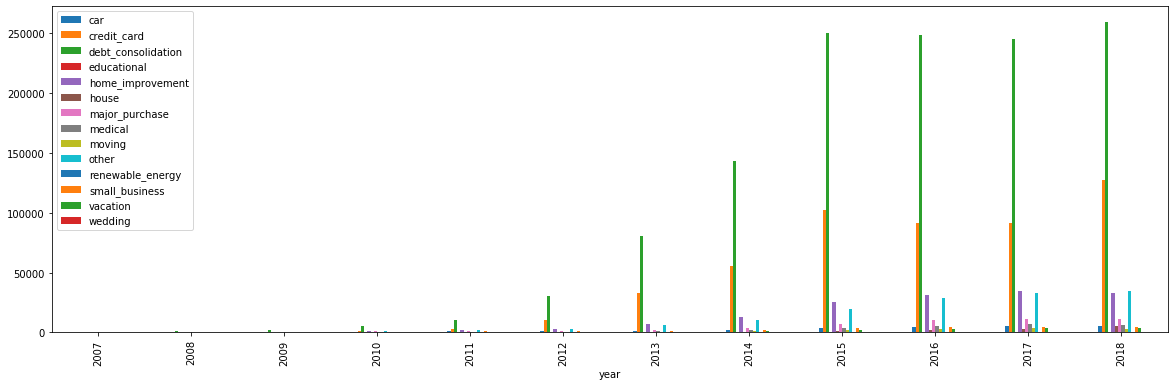

In [66]:
subset3.plot(kind='bar', figsize=(20,6))
plt.legend(loc=2)

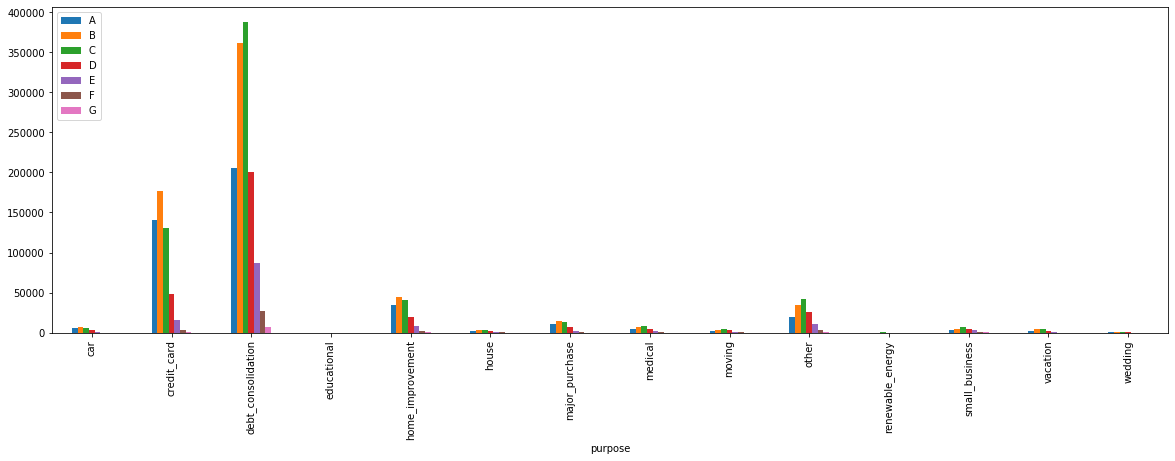

In [68]:
subset4 = subset.groupby(['grade','purpose'])['purpose'].count().unstack('grade').fillna(0)
subset4.plot(kind='bar', figsize=(20,6))
plt.legend(loc=2)

In [8]:
subset5 = subset.groupby(['year','grade','purpose'])['year'].count().unstack('grade').fillna(0)
subset5

grade                         A       B       C       D       E      F      G
year purpose                                                                 
2007 car                    3.0     2.0     3.0     2.0     1.0    2.0    0.0
     credit_card            9.0    11.0    23.0    16.0    15.0    7.0    6.0
     debt_consolidation    13.0    21.0    45.0    45.0    42.0   22.0   19.0
     educational            5.0     6.0    11.0     3.0     7.0    3.0    1.0
     home_improvement      10.0     9.0     4.0     6.0     4.0    2.0    1.0
...                         ...     ...     ...     ...     ...    ...    ...
2018 other               7333.0  9500.0  9329.0  6215.0  2178.0  363.0  100.0
     renewable_energy      56.0    79.0    76.0    45.0    18.0    1.0    0.0
     small_business       956.0  1188.0  1273.0   841.0   264.0   46.0   15.0
     vacation             724.0   987.0   924.0   644.0   207.0   12.0    3.0
     wedding                0.0     1.0     3.0     0.0     1.0    0.0    0.0

[161 rows x 7 columns]

In [11]:
subset5.groupby(level="year").sum()

grade,A,B,C,D,E,F,G
year,,,,,,,
2007,78.0,98.0,141.0,99.0,100.0,52.0,35.0
2008,318.0,594.0,580.0,419.0,285.0,111.0,86.0
2009,1203.0,1445.0,1348.0,817.0,308.0,105.0,55.0
2010,2830.0,3687.0,2729.0,1885.0,962.0,311.0,133.0
2011,5754.0,6565.0,3942.0,2796.0,1739.0,722.0,203.0
2012,10901.0,18507.0,11875.0,7323.0,3185.0,1315.0,261.0
2013,17679.0,44116.0,38134.0,20569.0,9059.0,4393.0,864.0
2014,36108.0,61935.0,66565.0,42992.0,20121.0,6223.0,1685.0
2015,73336.0,117606.0,120567.0,62654.0,34948.0,9817.0,2167.0


## Rejected

In [74]:
rejected = pd.read_csv('rejected_2007_to_2018Q4.csv')

In [77]:
rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [78]:
rejected.describe()

,Amount Requested,Risk_Score,Policy Code
count,2.764874e+07,9.151111e+06,2.764782e+07
mean,1.313324e+04,6.281721e+02,6.375113e-03
std,1.500964e+04,8.993679e+01,1.127368e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.800000e+03,5.910000e+02,0.000000e+00
50%,1.000000e+04,6.370000e+02,0.000000e+00
75%,2.000000e+04,6.750000e+02,0.000000e+00
max,1.400000e+06,9.900000e+02,2.000000e+00


## Loan Amount

In [81]:
accepted.groupby(['grade']).loan_amnt.describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,433027.0,14603.343210,9107.975657,500.0,8000.00,12000.0,20000.00,40000.0
B,663557.0,14173.338199,8957.012601,500.0,7400.00,12000.0,20000.00,40000.0
C,650053.0,15038.083318,9203.950054,500.0,8000.00,13000.0,20000.00,40000.0
D,324424.0,15711.983007,9250.612823,500.0,8575.00,14400.0,21200.00,40000.0
E,135639.0,17453.078392,9363.276694,600.0,10000.00,16000.0,24175.00,40000.0
F,41800.0,19124.646531,9166.366254,1000.0,12000.00,18175.0,25600.00,40000.0
G,12168.0,20383.988741,8994.472986,600.0,13193.75,19800.0,27656.25,40000.0


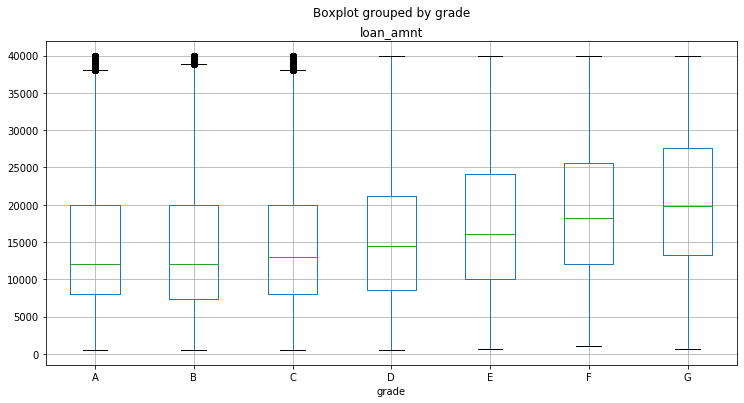

In [85]:
grade_amnt = accepted[['grade','loan_amnt']]
grade_amnt.boxplot(by='grade',column='loan_amnt',figsize=(12,6))

## Borrowers: Interest Rate

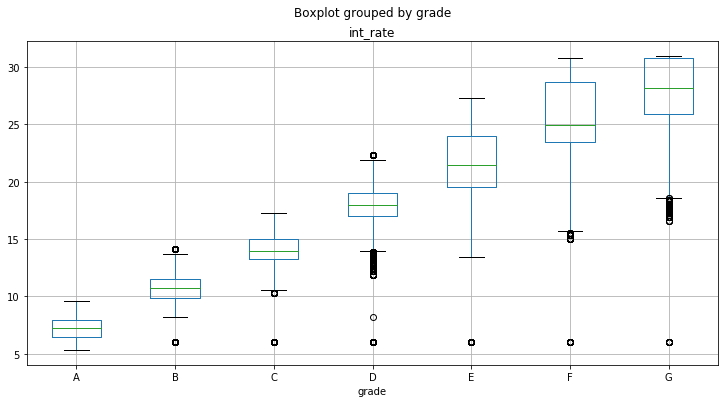

In [86]:
grade_intrate = accepted[['grade','int_rate']]
grade_intrate.boxplot(by='grade',column='int_rate',figsize=(12,6))

In [5]:
y = accepted['int_rate'].dropna()
x = accepted['issue_d'].dropna()

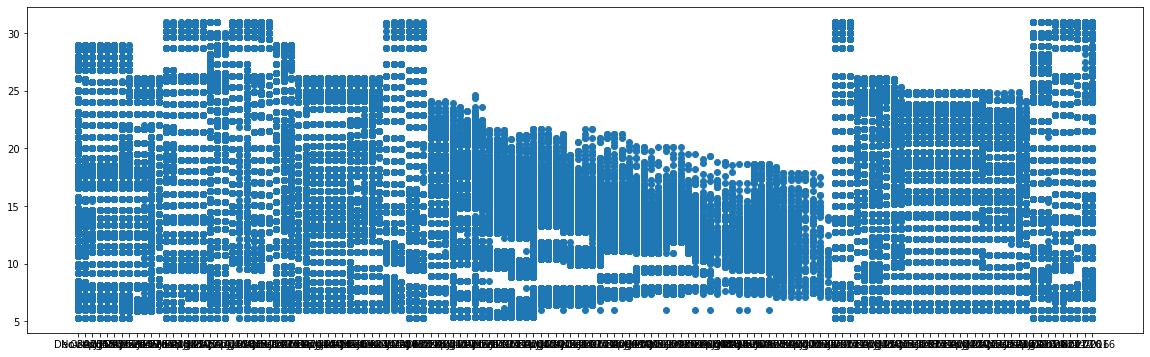

In [9]:
plt.figure(figsize = [20,6])
plt.scatter(x,y)

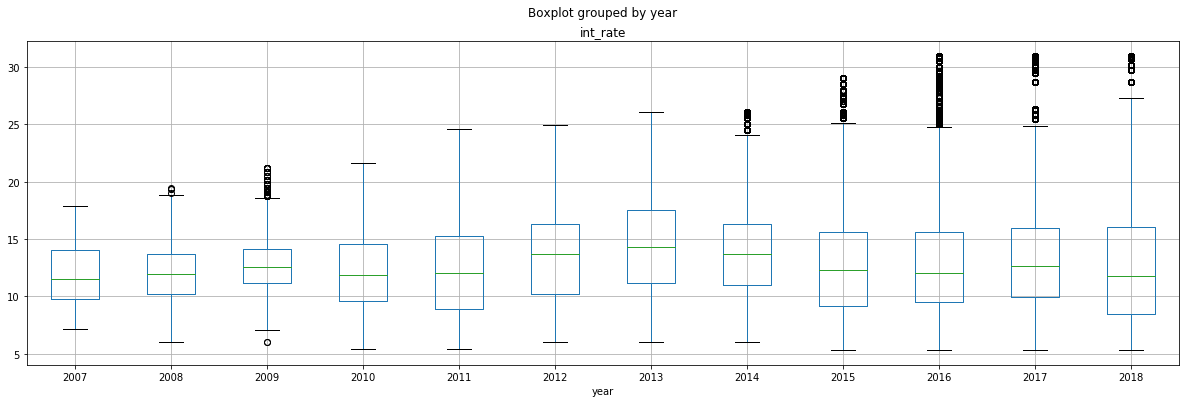

In [23]:
date_intrate = subset[['year','int_rate']]
date_intrate.boxplot(by='year',column='int_rate',figsize=(20,6))

In [15]:
accepted['term'].value_counts()

 36 months    1609754
 60 months     650914
Name: term, dtype: int64

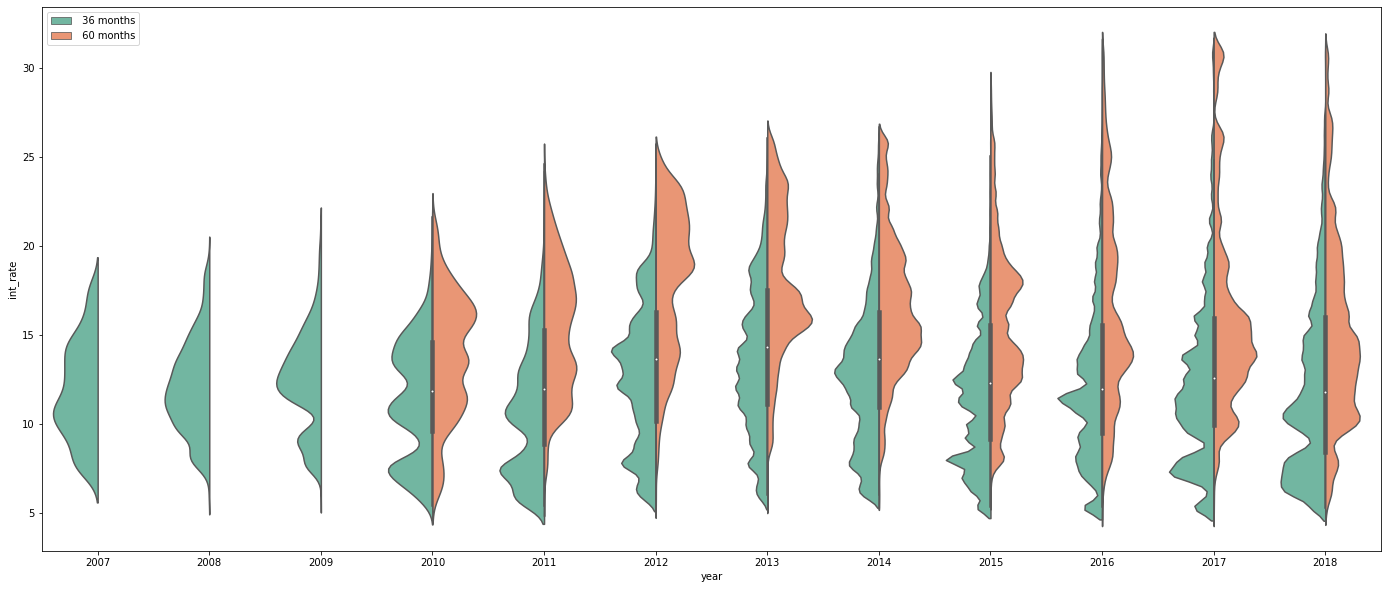

In [36]:
fig, ax = plt.subplots(figsize=[24,10])
ax = sns.violinplot(x="year", y="int_rate", hue="term", data=subset, palette="Set2", split=True)
ax.legend(loc=2)

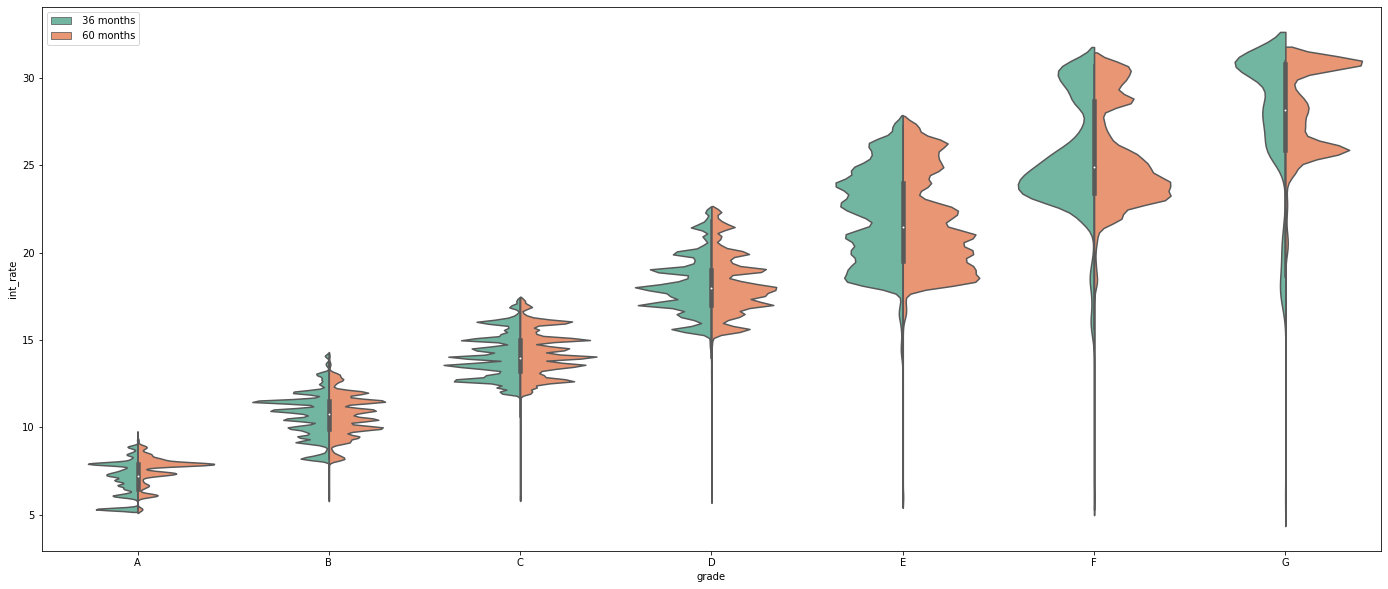

In [6]:
fig, ax = plt.subplots(figsize=[24,10])
ax = sns.violinplot(x="grade", y="int_rate", hue="term", data=subset, palette="Set2", split=True, order = ["A","B","C","D","E","F","G"])
ax.legend(loc=2)

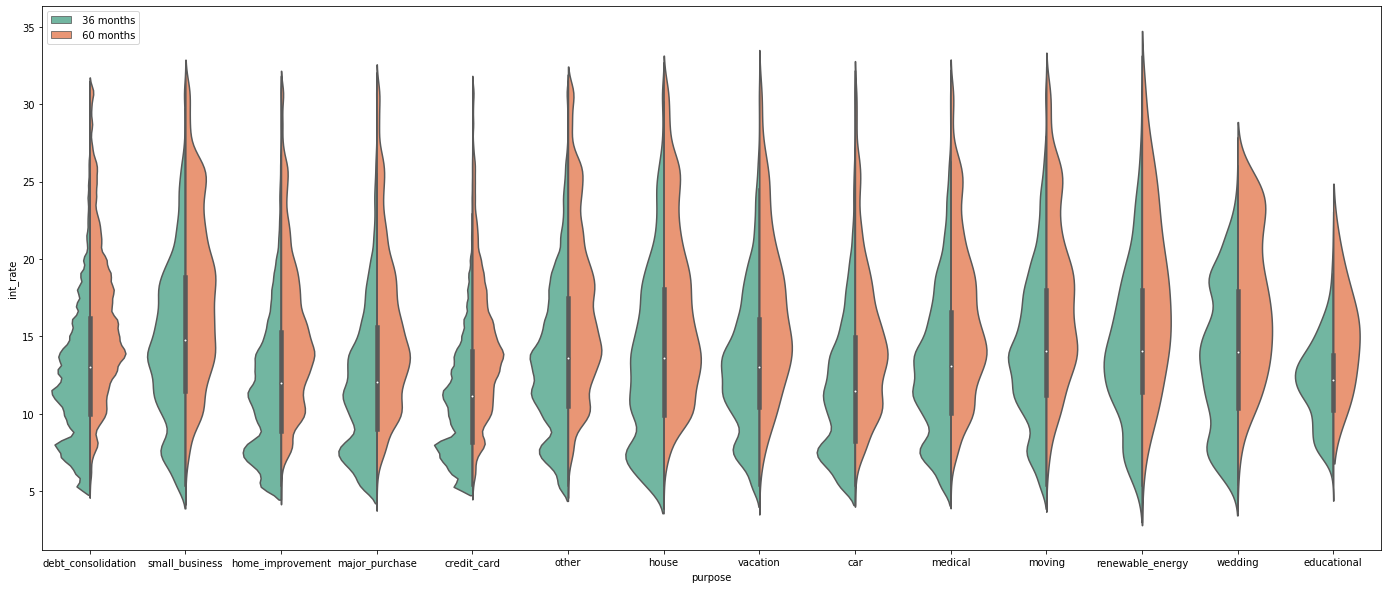

In [14]:
fig, ax = plt.subplots(figsize=[24,10])
ax = sns.violinplot(x="purpose", y="int_rate", hue="term", data=subset, palette="Set2", split=True)
ax.legend(loc=2)

## Investors: Delinquency

In [92]:
accepted['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

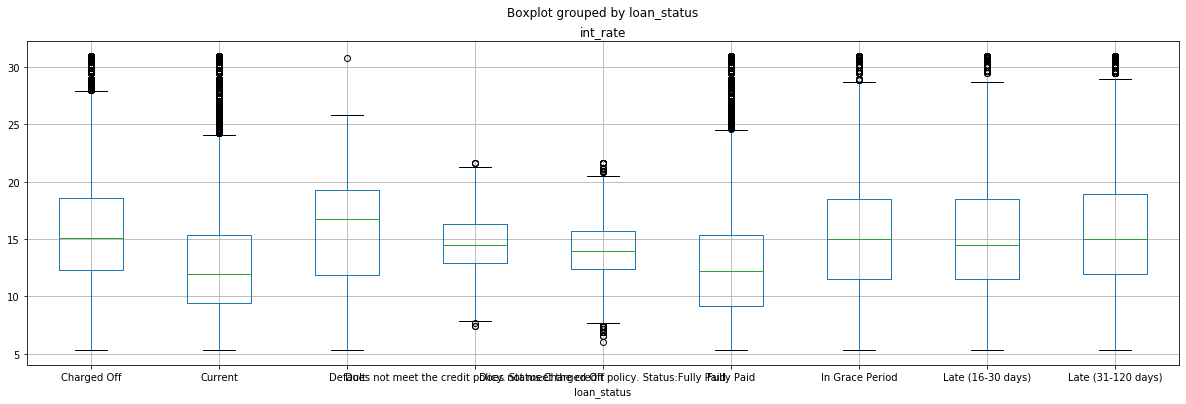

In [17]:
status_intrate = accepted[['loan_status','int_rate']]
status_intrate.boxplot(by='loan_status',column='int_rate',figsize=(20,6))

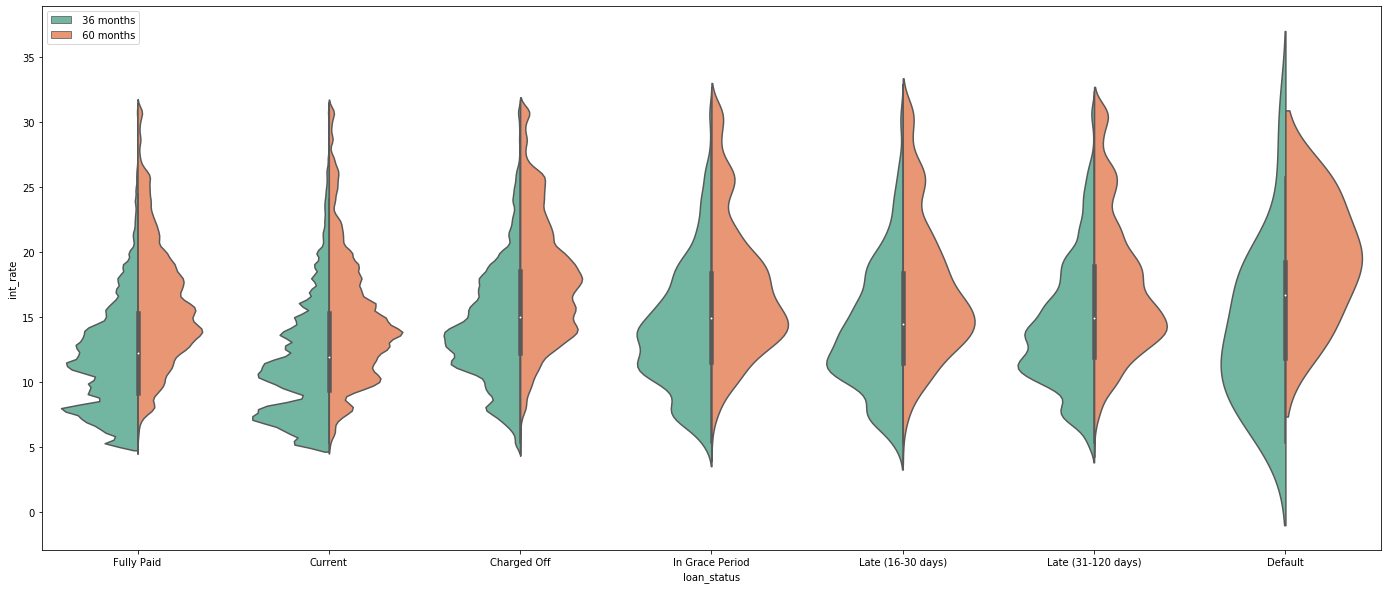

In [19]:
fig, ax = plt.subplots(figsize=[24,10])
ax = sns.violinplot(x="loan_status", y="int_rate", hue="term", data=accepted, palette="Set2", split=True, order=['Fully Paid','Current','Charged Off','In Grace Period','Late (16-30 days)','Late (31-120 days)','Default'])
ax.legend(loc=2)

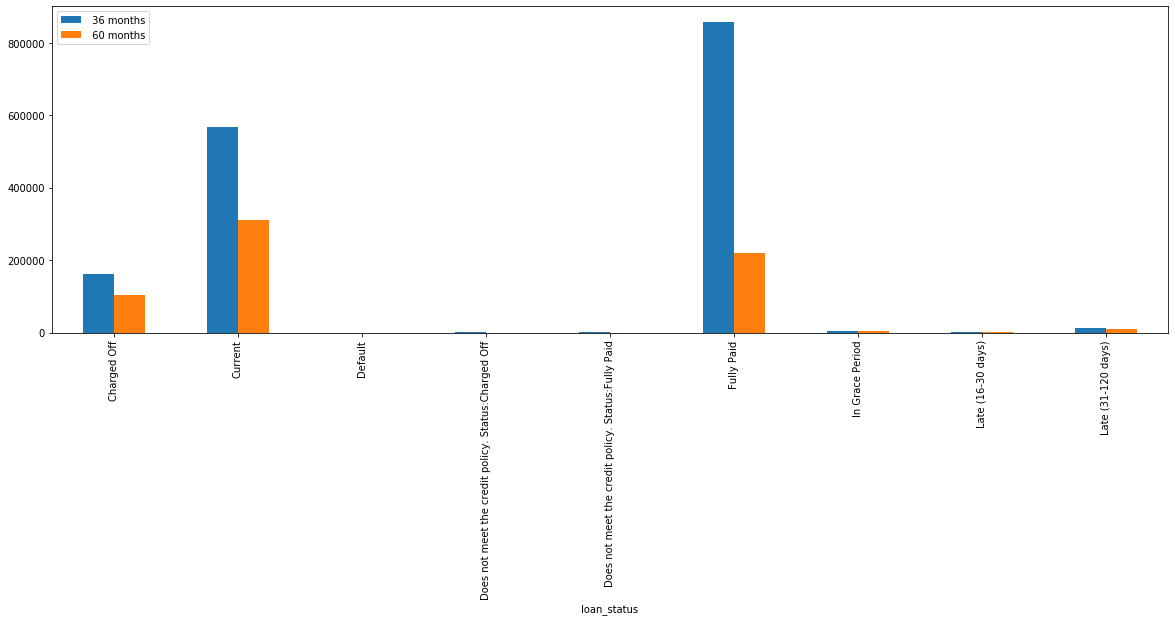

In [17]:
df = accepted.groupby(['loan_status','term'])['loan_status'].count().unstack('term').fillna(0)
df.plot(kind='bar', figsize=(20,6))
plt.legend(loc=2)

In [10]:
df

term,36 months,60 months
loan_status,,
Charged Off,163252,105307
Current,566695,311622
Default,25,15
Does not meet the credit policy. Status:Charged Off,649,112
Does not meet the credit policy. Status:Fully Paid,1789,199
Fully Paid,857491,219260
In Grace Period,4834,3602
Late (16-30 days),2545,1804
Late (31-120 days),12474,8993


In [16]:
accepted.groupby(['loan_status','term'])['loan_status'].count().unstack('term').fillna(0)

term,36 months,60 months
loan_status,,
Charged Off,163252,105307
Current,566695,311622
Default,25,15
Does not meet the credit policy. Status:Charged Off,649,112
Does not meet the credit policy. Status:Fully Paid,1789,199
Fully Paid,857491,219260
In Grace Period,4834,3602
Late (16-30 days),2545,1804
Late (31-120 days),12474,8993


In [51]:
#accepted['duration'] = accepted['last_pymnt_d'] - accepted['issue_d']
test['last_pymnt_d']=pd.to_datetime(test['last_pymnt_d'])

/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
test.issue_d=pd.to_datetime(test.issue_d)
#test['year'] = datetime.strptime(test['issue_d'],'%Y')
test['issue_d']

/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Timestamp('2015-12-01 00:00:00')

In [53]:
test['loan_status']

'Fully Paid'

In [54]:
test['duration'] = test['last_pymnt_d'] - test['issue_d']

/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [55]:
test['duration']

Timedelta('1127 days 00:00:00')

In [56]:
test['issue_d']

Timestamp('2015-12-01 00:00:00')

In [25]:
pd.to_datetime(test['last_pymnt_d'])

Timestamp('2019-01-01 00:00:00')

In [4]:
accepted.last_pymnt_d.value_counts()

Mar-2019    853003
Feb-2019     97074
Aug-2018     39615
Jan-2019     38483
Mar-2018     38269
             ...  
Jun-2008        20
Mar-2008        18
Jan-2008        11
Feb-2008         8
Dec-2007         2
Name: last_pymnt_d, Length: 136, dtype: int64

In [3]:
accepted.issue_d=pd.to_datetime(accepted.issue_d)

### Question:
- For investors, the profitability of the loans is of their central 
concern.
- For a given loan, the profit-and-loss (in percentages) can be computed as
the (total_payment - principal)/principal.
- For those loans which are eventually 'Fully Paid', what are the average
returns (or the distributions of returns) of different loan grades/terms?
- For those loans wich are default or beyond, what are the average returns or return distributions?
- What about all the loans which have been 
terminated ('fully paid', 'default', 'charged off')?
- What about the loans which end up in **loan settlement negotiations**?
- Any variation of patterns for different loan purposes?
- What happens if the issuance years are included in your analysis?
- Is there any pattern between loan duration vs return rate?

In [63]:
subset10 = accepted[['grade','loan_status','funded_amnt','funded_amnt_inv','term','total_pymnt','total_pymnt_inv']]
subset10.dropna(axis=0)

,grade,loan_status,funded_amnt,funded_amnt_inv,term,total_pymnt,total_pymnt_inv
0,C,Fully Paid,3600.0,3600.0,36 months,4421.723917,4421.72
1,C,Fully Paid,24700.0,24700.0,36 months,25679.660000,25679.66
2,B,Fully Paid,20000.0,20000.0,60 months,22705.924294,22705.92
3,C,Current,35000.0,35000.0,60 months,31464.010000,31464.01
4,F,Fully Paid,10400.0,10400.0,60 months,11740.500000,11740.50
...,...,...,...,...,...,...,...
2260694,C,Current,24000.0,24000.0,60 months,15760.500000,15760.50
2260695,B,Current,24000.0,24000.0,60 months,15008.530000,15008.53
2260696,B,Current,40000.0,40000.0,60 months,24903.930000,24903.93
2260697,C,Charged Off,24000.0,24000.0,60 months,6755.400000,6755.40


In [67]:
subset10['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [65]:
subset10.count()

grade              2260668
loan_status        2260668
funded_amnt        2260668
funded_amnt_inv    2260668
term               2260668
total_pymnt        2260668
total_pymnt_inv    2260668
dtype: int64

In [68]:
subset10 = subset10.loc[subset10.loan_status == "Fully Paid"]
subset10

,grade,loan_status,funded_amnt,funded_amnt_inv,term,total_pymnt,total_pymnt_inv
0,C,Fully Paid,3600.0,3600.0,36 months,4421.723917,4421.72
1,C,Fully Paid,24700.0,24700.0,36 months,25679.660000,25679.66
2,B,Fully Paid,20000.0,20000.0,60 months,22705.924294,22705.92
4,F,Fully Paid,10400.0,10400.0,60 months,11740.500000,11740.50
5,C,Fully Paid,11950.0,11950.0,36 months,13708.948530,13708.95
...,...,...,...,...,...,...,...
2260684,B,Fully Paid,15000.0,15000.0,36 months,15908.001163,15908.00
2260686,C,Fully Paid,23800.0,23800.0,60 months,29818.871195,29818.87
2260688,B,Fully Paid,18000.0,18000.0,60 months,20756.233632,20756.23
2260690,C,Fully Paid,29400.0,29400.0,60 months,35848.764532,35848.76


In [69]:
subset10['PnL'] = (subset10['total_pymnt_inv'] - subset10['funded_amnt_inv'])/subset10['funded_amnt_inv']*100
subset10

,grade,loan_status,funded_amnt,funded_amnt_inv,term,total_pymnt,total_pymnt_inv,PnL
0,C,Fully Paid,3600.0,3600.0,36 months,4421.723917,4421.72,22.825556
1,C,Fully Paid,24700.0,24700.0,36 months,25679.660000,25679.66,3.966235
2,B,Fully Paid,20000.0,20000.0,60 months,22705.924294,22705.92,13.529600
4,F,Fully Paid,10400.0,10400.0,60 months,11740.500000,11740.50,12.889423
5,C,Fully Paid,11950.0,11950.0,36 months,13708.948530,13708.95,14.719247
...,...,...,...,...,...,...,...,...
2260684,B,Fully Paid,15000.0,15000.0,36 months,15908.001163,15908.00,6.053333
2260686,C,Fully Paid,23800.0,23800.0,60 months,29818.871195,29818.87,25.289370
2260688,B,Fully Paid,18000.0,18000.0,60 months,20756.233632,20756.23,15.312389
2260690,C,Fully Paid,29400.0,29400.0,60 months,35848.764532,35848.76,21.934558


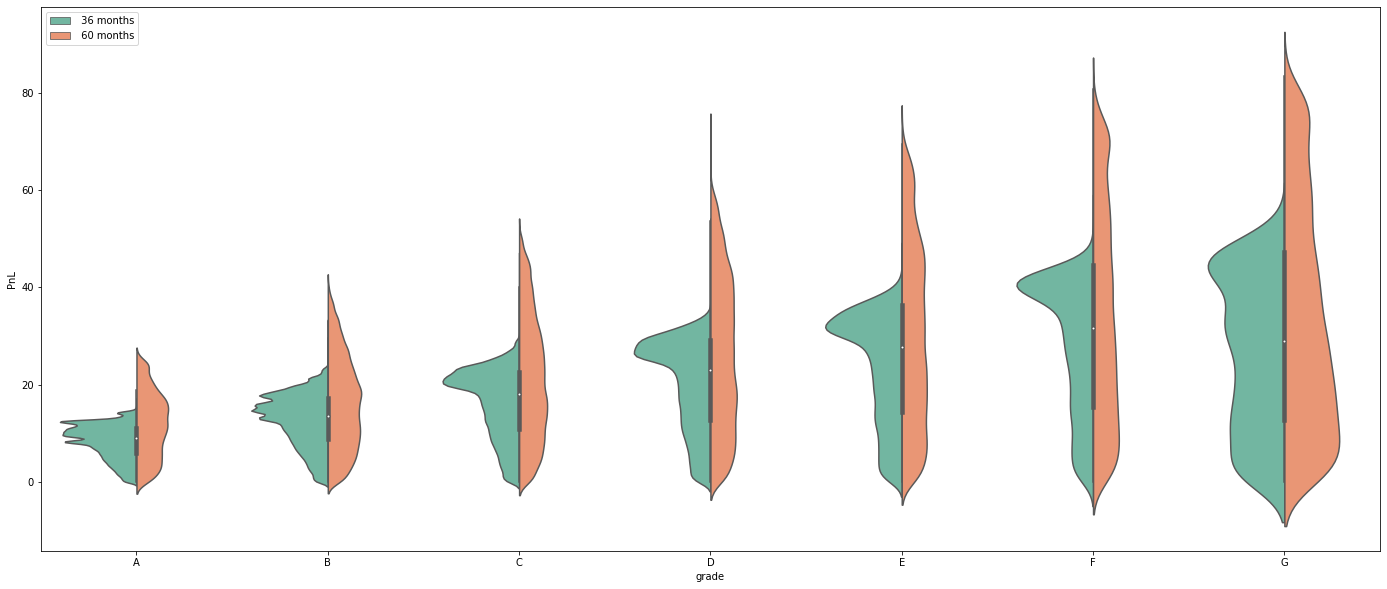

In [39]:
fig, ax = plt.subplots(figsize=[24,10])
ax = sns.violinplot(x="grade", y="PnL", hue="term", data=subset10, palette="Set2", split=True, order=['A','B','C','D','E','F','G'])
ax.legend(loc=2)

In [40]:
accepted['PnL'] = (accepted['total_pymnt_inv'] - accepted['funded_amnt_inv'])/accepted['funded_amnt_inv']*100

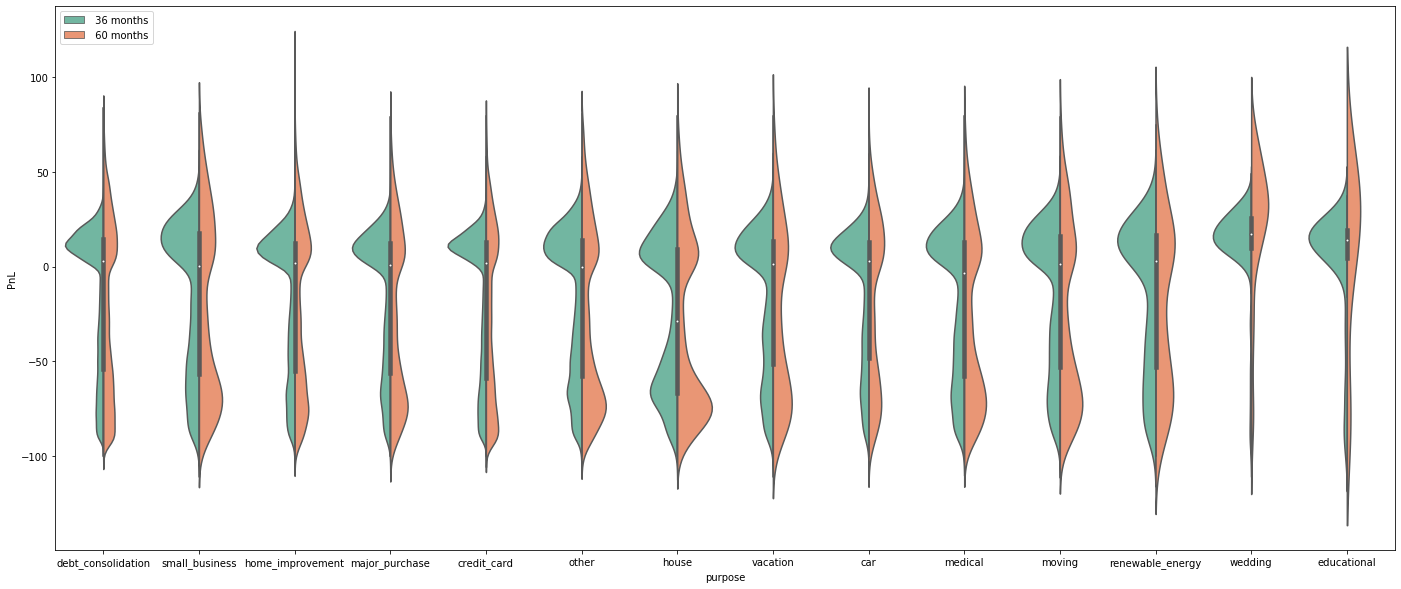

In [41]:
fig, ax = plt.subplots(figsize=[24,10])
ax = sns.violinplot(x="purpose", y="PnL", hue="term", data=accepted, palette="Set2", split=True)
ax.legend(loc=2)

In [48]:
accepted.loc[accepted.debt_settlement_flag=='Y']['PnL'].mean()

-25.895308014773946

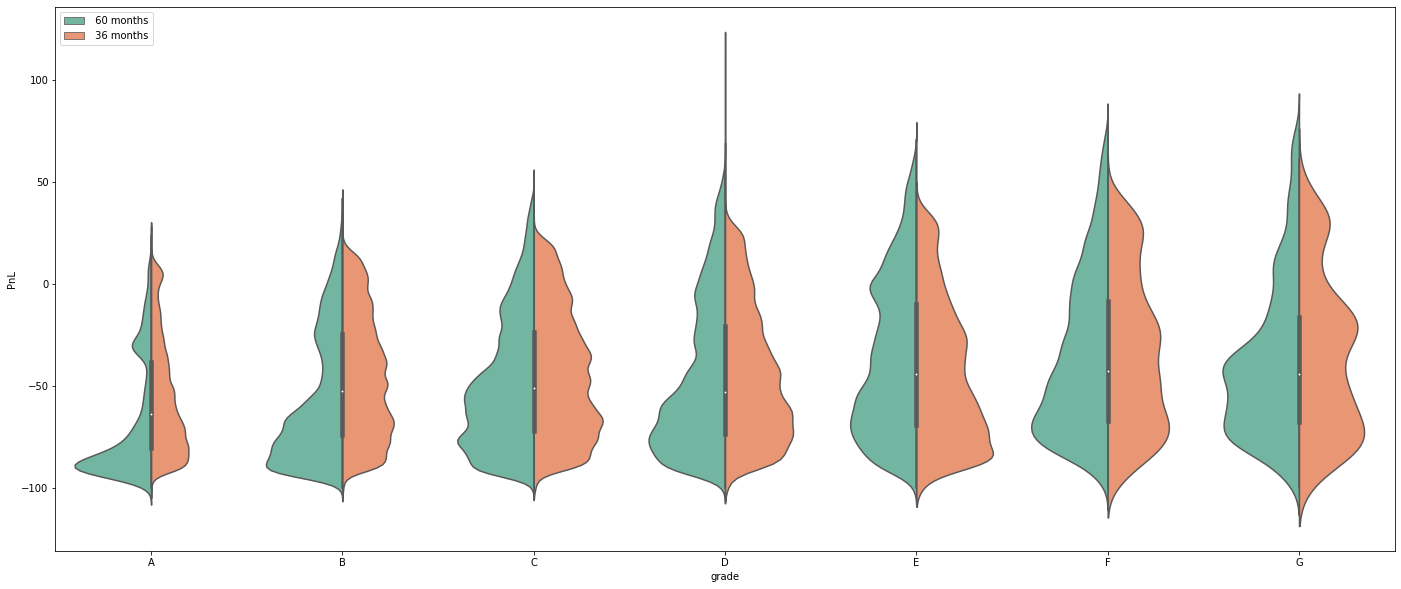

In [53]:
fig, ax = plt.subplots(figsize=[24,10])
ax = sns.violinplot(x="grade", y="PnL", hue="term", data=accepted.loc[accepted.loan_status!='Fully Paid'], palette="Set2", split=True, order=['A','B','C','D','E','F','G'])
ax.legend(loc=2)

In [54]:
accepted.loc[accepted.loan_status=='Default']['PnL'].mean()

-40.67022549219331

In [55]:
accepted.loc[accepted.loan_status=='Charged Off']['PnL'].mean()

-45.856502081336394

In [58]:
#pip install lifelines

     |████████████████████████████████| 348 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 1.5 MB/s eta 0:00:01
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47990 sha256=717bbf779b8458732786daa5e4aa497ca3e5a3f4e33ba3dac2d22dc7581e8f2a
  Stored in directory: /Users/viviannchan/Library/Caches/pip/wheels/ef/32/31/0e87227cd0ca1d99ad51fbe4b54c6fa02afccf7e483d045e04
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4034 sha256=c6ce781aa62c7aae3075632817645ec9e5f51cc85c8ad51d99288dbfe4aa10d3
  Stored in directory: /Users/viviannchan/Library/Caches/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd autograd-gamma
Note: you may need to restart the kernel to use updated packages.


Question: Survival Analysis on Survival Probabilities
- In the context of **Lending Club Loans**, a loan starts to default $121$ days 
after it fails to make the payment on time.
- For loans which are eventually paid in full, analyze the probabilities
of survival at different time durations (known as survival plot). How are these probabilities of 'survival'
 related to the loan grade/subgrade or the FICO scores of the borrowers?
To visualize, you want to plot the so-called **survival curve**.
- For loans which are eventually defaulted, analyze the probabilities of
survival at different time durations and find out its relationship with loan
grade/subgrade, FICO scores or the other credit related attributes.
- Lumping defaulted loans and completed loans together, a loan either pre-pays early
, defaults or completes at maturity. Perform survival analysis and study what
features affect the patterns.

- You can either compute from the raw data from scratch, or use R-package like **survminer**
 to assist your analysis.
- In **survival analysis** jargon, the dual cause of the early termination of the loan (either early prepayment or default) 
is usually known as **competing events/competing risks**, or **mixture cure** model.

In [59]:
from lifelines import KaplanMeierFitter

In [70]:
accepted['hardship_flag'].value_counts()

N    2259836
Y        832
Name: hardship_flag, dtype: int64

In [71]:
accepted['debt_settlement_flag'].value_counts()

N    2226422
Y      34246
Name: debt_settlement_flag, dtype: int64

In [74]:
accepted.loc[accepted.hardship_flag=='Y']['loan_status'].value_counts()

Late (31-120 days)    729
Late (16-30 days)      83
In Grace Period        16
Current                 4
Name: loan_status, dtype: int64

In [75]:
accepted.loc[accepted.debt_settlement_flag=='Y']['loan_status'].value_counts()

Charged Off                                            33271
Late (31-120 days)                                       905
Current                                                   28
Late (16-30 days)                                         11
In Grace Period                                           10
Does not meet the credit policy. Status:Charged Off       10
Default                                                    6
Fully Paid                                                 5
Name: loan_status, dtype: int64

In [78]:
accepted.loc[accepted.hardship_flag=='Y']['debt_settlement_flag'].value_counts()

N    832
Name: debt_settlement_flag, dtype: int64

In [79]:
accepted['emp_title'].value_counts()

Teacher                         38824
Manager                         34298
Owner                           21977
Registered Nurse                15867
Driver                          14753
                                ...  
Corporate Trust Associate           1
Rusty Pelican                       1
Manager, Compensation               1
animal aide                         1
Sr. Acct. Officer Specailist        1
Name: emp_title, Length: 512694, dtype: int64

In [82]:
accepted.loc[accepted.loan_status=='Fully Paid']['debt_settlement_flag'].value_counts()

N    1076746
Y          5
Name: debt_settlement_flag, dtype: int64

In [4]:
accepted['issue_d'] = accepted['issue_d'].astype(str).dropna()
accepted['year'] = accepted['issue_d'].apply(lambda x: x.split("-")[-1]) 

In [41]:
x1 = accepted.groupby(['year']).funded_amnt.count().dropna()
#x1 = x1.dropna()
x1

year
2007       603
2008      2393
2009      5281
2010     12537
2011     21721
2012     53367
2013    134814
2014    235629
2015    421095
2016    434407
2017    443579
2018    495242
nan          0
Name: funded_amnt, dtype: int64

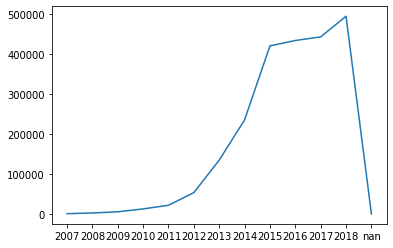

In [30]:
plt.plot(x1)

In [40]:
x2 = accepted.groupby(['year']).funded_amnt.sum()
x2 = x2.drop(['nan'])
x2

year
2007    4.791550e+06
2008    1.997502e+07
2009    5.181475e+07
2010    1.263512e+08
2011    2.573636e+08
2012    7.179426e+08
2013    1.982760e+09
2014    3.503840e+09
2015    6.417608e+09
2016    6.400542e+09
2017    6.584957e+09
2018    7.936263e+09
Name: funded_amnt, dtype: float64

AttributeError: 'AxesSubplot' object has no attribute 'subset2'

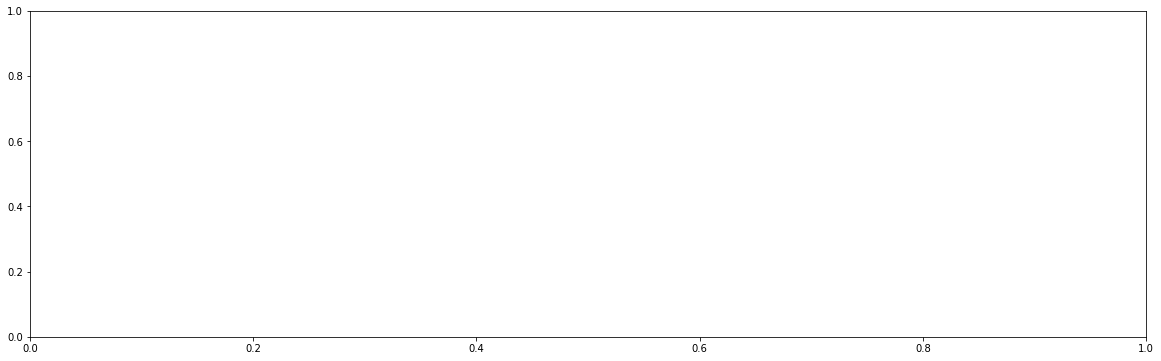

In [51]:
fig, ax1 = plt.subplots(figsize=[20,6])
ax1.plot(x1)
#subset2.plot(kind='bar', stacked=True, figsize=(20,6))
ax2 = ax1.twinx()
ax2.plot(x2)
plt.show()

Text(0.5, 1.0, 'Total Loan $ Amount by Year')

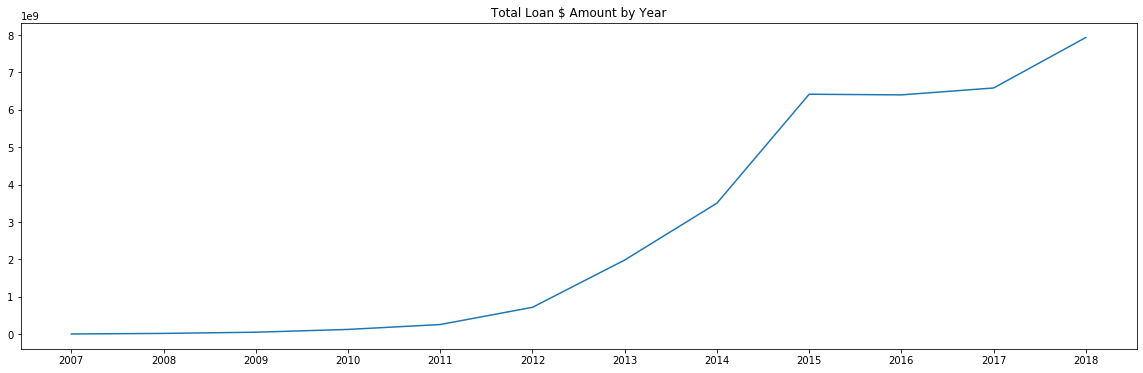

In [43]:
plt.figure(figsize=[20,6])
plt.plot(x)
plt.title('Total Loan $ Amount by Year')

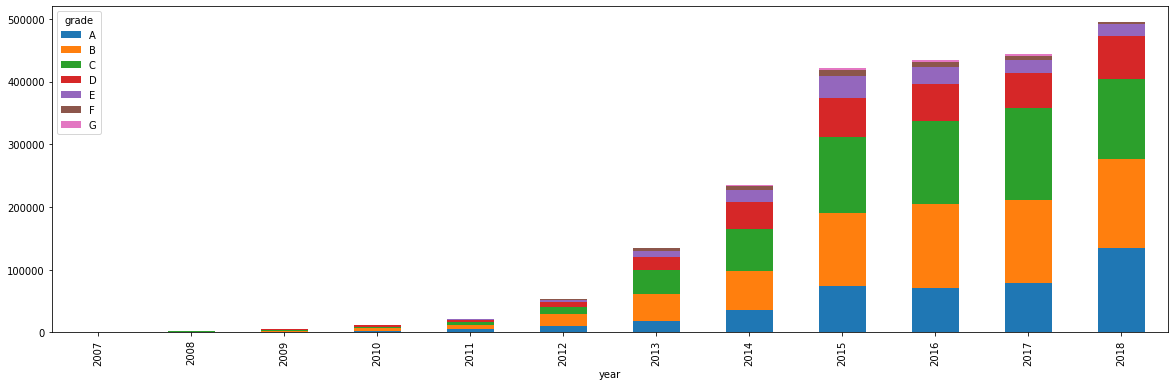

In [52]:
subset2.plot(kind='bar', stacked=True, figsize=(20,6))

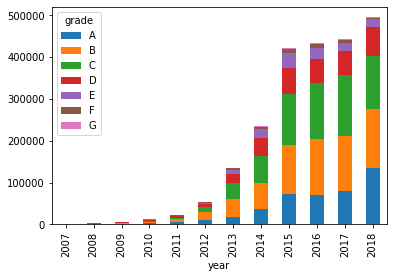

In [62]:
subset2.plot(kind='bar',stacked=True)

In [66]:
subset2.A

year
2007        78
2008       318
2009      1203
2010      2830
2011      5754
2012     10901
2013     17679
2014     36108
2015     73336
2016     70847
2017     78796
2018    135177
Name: A, dtype: int64

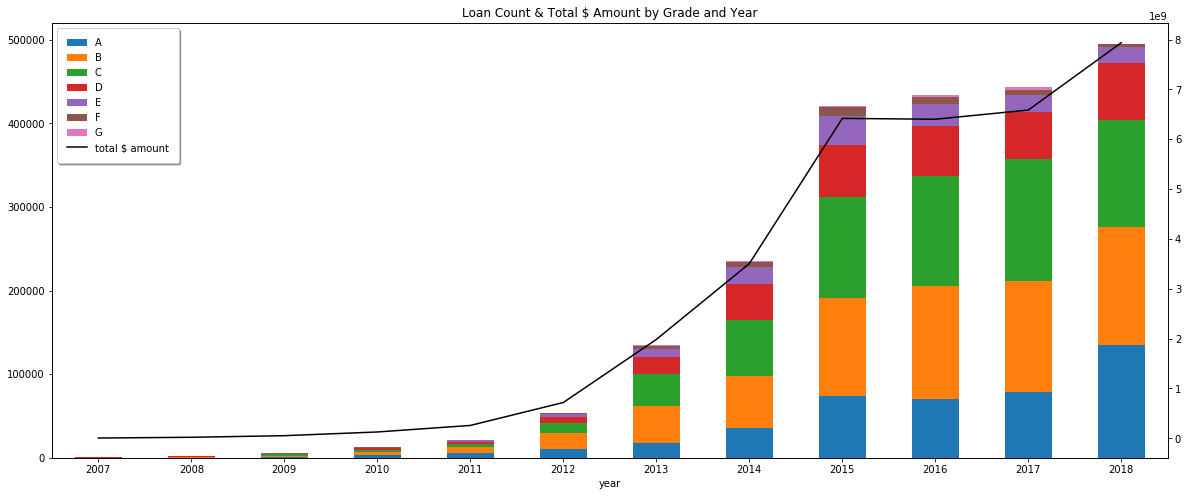

In [96]:
df = pd.DataFrame({'total $ amount' : x2,
                   'A' : subset2.A, 
                   'B' : subset2.B,
                   'C' : subset2.C, 
                   'D' : subset2.D,
                   'E' : subset2.E,
                   'F' : subset2.F,
                   'G' : subset2.G})

df.iloc[:, 1:10].plot(kind='bar', stacked=True, figsize=[20,8])
leg = plt.legend()
df.iloc[:, 0].plot(kind='line', y='z', secondary_y=True, color='k')
leg2 = plt.legend()
plt.legend(leg.get_patches()+leg2.get_lines(), 
           [text.get_text() for text in leg.get_texts()+leg2.get_texts()], 
           loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)
leg.remove()
plt.title('Loan Count & Total $ Amount by Grade and Year')
#plt.ylabel('number of loans')

plt.show()

In [74]:
x2

,A,B,C,z
year,,,,
2007,78,98,141,4.791550e+06
2008,318,594,580,1.997502e+07
2009,1203,1445,1348,5.181475e+07
2010,2830,3687,2729,1.263512e+08
2011,5754,6565,3942,2.573636e+08
2012,10901,18507,11875,7.179426e+08
2013,17679,44116,38134,1.982760e+09
2014,36108,61935,66565,3.503840e+09
2015,73336,117606,120567,6.417608e+09
